#Capstone Project Bengkel Koding

- Nama : Sofyan Saif Pahlevi
- NIM : A11.2022.14006
- Kelp : DS-02

###Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Load Dataset

In [5]:
file_path = 'ObesityDataSet.csv'
df = pd.read_csv(file_path)

Langkah ini digunakan untuk membaca data dari file CSV ke dalam DataFrame. Ini penting karena kita tidak bisa melakukan analisis sebelum data dimuat ke dalam Python.

In [6]:
#Tampilkan beberapa baris pertama dan informasi umum dataset
print("Beberapa Baris Pertama Dataset:")
print(df.head())

Beberapa Baris Pertama Dataset:
  Age  Gender Height Weight        CALC FAVC FCVC NCP  SCC SMOKE CH2O  \
0  21  Female   1.62     64          no   no    2   3   no    no    2   
1  21  Female   1.52     56   Sometimes   no    3   3  yes   yes    3   
2  23    Male    1.8     77  Frequently   no    2   3   no    no    2   
3  27    Male    1.8     87  Frequently   no    3   3   no    no    2   
4  22    Male   1.78   89.8   Sometimes   no    2   1   no    no    2   

  family_history_with_overweight FAF TUE       CAEC                 MTRANS  \
0                            yes   0   1  Sometimes  Public_Transportation   
1                            yes   3   0  Sometimes  Public_Transportation   
2                            yes   2   1  Sometimes  Public_Transportation   
3                             no   2   0  Sometimes                Walking   
4                             no   0   0  Sometimes  Public_Transportation   

            NObeyesdad  
0        Normal_Weight  
1        N

Untuk melihat lima baris pertama dari dataset. Ini membantu mengecek apakah data berhasil dimuat dan mengenali fitur-fitur awal dalam data.

In [7]:
print("\nInformasi Umum Dataset:")
df_info = df.info()
print(df_info)


Informasi Umum Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                    

Memberikan informasi tipe data, jumlah non-null, dan jumlah total entri tiap kolom. Ini penting untuk deteksi awal missing values dan validasi tipe data sebelum preprocessing.


Dapat terlihat dari informasi dataset bahwa :
  1. Jumlah baris dan kolom: Terdapat 2111 entri data dan 17 kolom.
  2. Tipe data: Semua kolom memiliki tipe data objek (string), yang menunjukkan bahwa data ini mungkin memerlukan konversi tipe untuk analisis lebih lanjut (misalnya, kolom numerik yang masih bertipe objek).
  3. Kolom dengan nilai kosong: Beberapa kolom memiliki nilai yang hilang (misalnya, kolom Age, Height, Weight, dll).

##Exploratory Data Analysis (EDA)

In [11]:
# Mengecek missing values
missing_values = df.isnull().sum()

missing_values

,0
Age,14
Gender,9
Height,12
Weight,11
CALC,5
FAVC,11
FCVC,8
NCP,12
SCC,10
SMOKE,5


In [15]:
# Mengecek unique values dan duplicates
unique_values = df.nunique()

unique_values

,0
Age,1394
Gender,3
Height,1562
Weight,1518
CALC,5
FAVC,3
FCVC,808
NCP,637
SCC,3
SMOKE,3


In [16]:
# Mengecek duplicates values
duplicates = df.duplicated().sum()

duplicates

np.int64(18)

Hasil Pengecekan data menunjukkan :
  1. Nilai yang hilang: Kolom dengan nilai yang hilang antara 5 hingga 14 entri, misalnya kolom Age memiliki 14 entri kosong, Gender 9, dan seterusnya.
  2. Nilai yang unik :
    - Kolom Age memiliki 1394 nilai unik, yang menunjukkan bahwa ada banyak variasi dalam usia.
    - Kolom Gender hanya memiliki 3 nilai unik (kemungkinan "Female", "Male", dan mungkin satu kategori lainnya).
    - Kolom NObeyesdad (target variabel) memiliki 7 kategori unik (berkaitan dengan tingkat obesitas).
  3. Data Duplikat : Terdapat 18 duplikat dalam dataset ini, yang dapat dihapus jika diperlukan.


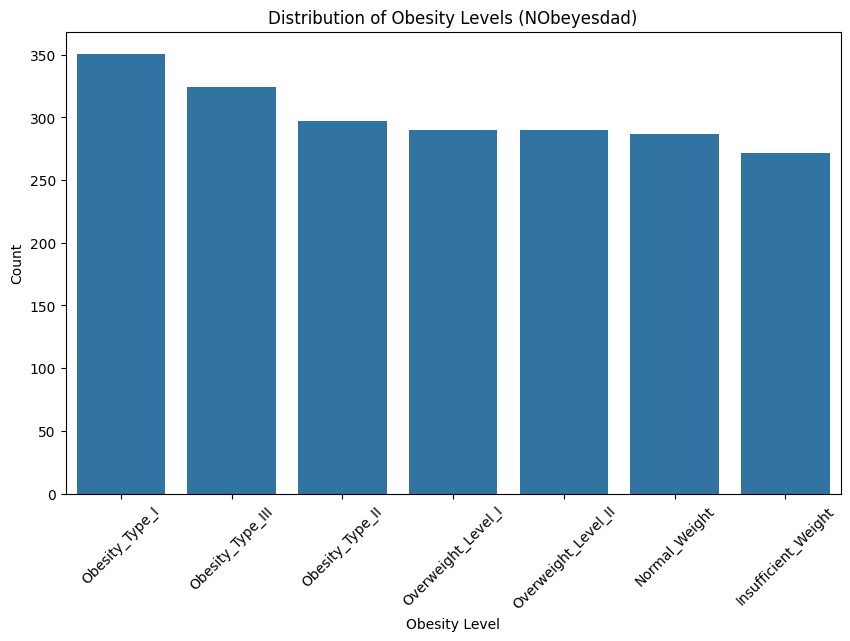

,count
NObeyesdad,
Obesity_Type_I,351
Obesity_Type_III,324
Obesity_Type_II,297
Overweight_Level_I,290
Overweight_Level_II,290
Normal_Weight,287
Insufficient_Weight,272


In [18]:
# Checking the balance of the target variable 'NObeyesdad'
target_distribution = df['NObeyesdad'].value_counts()

# Plotting the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=df, order=target_distribution.index)
plt.title('Distribution of Obesity Levels (NObeyesdad)')
plt.xlabel('Obesity Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

target_distribution

Dari hasil ini, kita dapat melihat bahwa dataset cukup seimbang, meskipun ada sedikit variasi jumlah antara kategori (misalnya, kategori Obesity_Type_I memiliki jumlah terbanyak, sementara Insufficient_Weight memiliki jumlah terendah). Namun, distribusi ini tidak terlalu ekstrem, sehingga pemodelan masih dapat dilakukan tanpa perlu penyesuaian berat kelas (class weighting) yang besar.

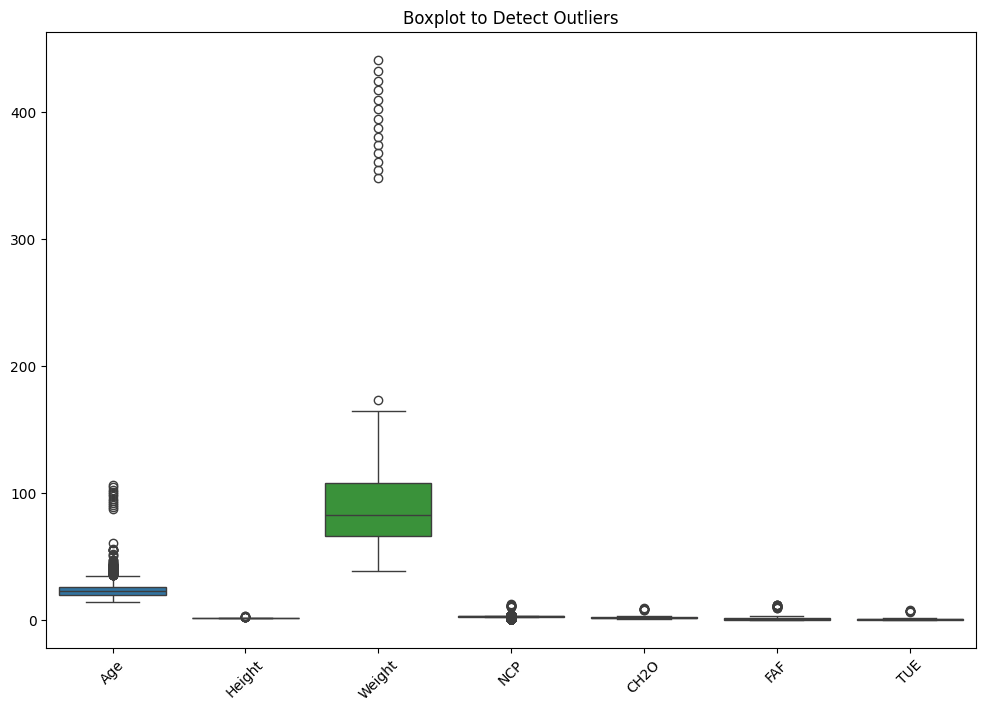

In [17]:
# Convert columns to numeric where applicable for visualization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')
df['NCP'] = pd.to_numeric(df['NCP'], errors='coerce')
df['CH2O'] = pd.to_numeric(df['CH2O'], errors='coerce')
df['FAF'] = pd.to_numeric(df['FAF'], errors='coerce')
df['TUE'] = pd.to_numeric(df['TUE'], errors='coerce')

# Plot boxplot to detect outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']])
plt.title("Boxplot to Detect Outliers")
plt.xticks(rotation=45)
plt.show()

Berikut adalah boxplot yang digunakan untuk mendeteksi outlier pada beberapa fitur numerik dalam dataset (seperti Age, Height, Weight, NCP, CH2O, FAF, dan TUE). Anda bisa melihat bahwa beberapa kolom menunjukkan tanda-tanda outlier, misalnya pada kolom Age, Weight, dan Height. Ini bisa menjadi indikasi adanya nilai yang jauh lebih besar atau lebih kecil dari rentang normal.

###Kesimpulan


Pada tahap Exploratory Data Analysis (EDA) ini, kami telah melakukan serangkaian langkah untuk memeriksa dataset yang berisi informasi mengenai kebiasaan makan dan kondisi fisik individu dari tiga negara (Meksiko, Peru, dan Kolombia), yang digunakan untuk memprediksi tingkat obesitas mereka. Berikut adalah kesimpulan rinci berdasarkan langkah-langkah yang telah dilakukan:

  1.  Informasi Umum Dataset:
    - Dataset terdiri dari 2111 entri dan 17 kolom, dengan berbagai atribut mengenai kebiasaan makan dan kondisi fisik individu.
    - Tipe data sebagian besar objek (string), perlu konversi untuk beberapa kolom numerik seperti Age, Height, dan Weight.
  
  2. Outlier:
    - Outlier ditemukan pada kolom Age, Weight, dan Height yang memerlukan penanganan untuk memastikan data konsisten dan tidak distorsi.

  3. Pemeriksaan Nilai Hilang:
    - Kolom seperti Age memiliki 14 nilai kosong, dan kolom lainnya memiliki nilai kosong antara 5 hingga 14 entri. Penanganan nilai kosong diperlukan.

  4. Distribusi Nilai Unik:
    - Kolom target NObeyesdad memiliki 7 kategori tingkat obesitas dengan distribusi yang cukup seimbang (rata-rata 290-350 entri per kategori).
    - Terdapat 18 data duplikat yang harus dihapus.

  5. Kesimpulan Umum:
    
    Dataset ini sangat berpotensi untuk digunakan dalam analisis prediksi tingkat obesitas berdasarkan kebiasaan makan dan kondisi fisik individu. Yang dimana memiliki berbagai tipe data yang membutuhkan pra-pemrosesan, termasuk konversi tipe data, penanganan nilai kosong, dan penghapusan outlier untuk memastikan data yang bersih dan konsisten. Kolom target NObeyesdad memiliki 7 kategori obesitas, yang memungkinkan analisis klasifikasi multikelas. Data yang seimbang memungkinkan pemodelan klasifikasi yang lebih efektif, meskipun ada sedikit perbedaan jumlah antar kategori yang perlu dipertimbangkan.